In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from linearmodels import PanelOLS
import plotly.express as px

sns.set_theme()

In [2]:
image_path = 'Images/'
path = 'Datasets/' # To be changed if needed

In [3]:
chapter = 'LR/'

# Education

In [4]:
schooling = pd.read_csv(path+'UNESCO/OPRI_DATA_NATIONAL.zip', dtype={'INDICATOR_ID': 'object'}, compression='zip')  # Upload the schooling data
schooling_labels = pd.read_csv(path+'UNESCO/OPRI_LABEL.csv') # Upload the schooling labels
SCH = schooling.copy()
SCH['INDICATOR_ID'] = SCH['INDICATOR_ID'].astype(str)
SCH = SCH[SCH['INDICATOR_ID'].str.contains('NART', na=False)] 
SCH = SCH.drop(columns=['MAGNITUDE','QUALIFIER'])
SCH = pd.merge(schooling_labels,SCH,how='left',on='INDICATOR_ID') # Merge the labels with the schooling data
SCH['YEAR'] = pd.to_datetime(SCH['YEAR'], format='%Y',errors='coerce').dt.year
Primary = SCH[SCH['INDICATOR_ID'].str.contains('NART.1', na=False)] # Filter for primary education
Secondary = SCH[SCH['INDICATOR_ID'].str.contains('NART.2', na=False)] # Filter for secondary education
Tertiary = SCH[SCH['INDICATOR_ID'].str.contains('NART.3', na=False)] # Filter for tertiary education
P = Primary.pivot_table(index=['COUNTRY_ID','YEAR'], columns='INDICATOR_ID', values='VALUE').reset_index()
S = Secondary.pivot_table(index=['COUNTRY_ID','YEAR'], columns='INDICATOR_ID', values='VALUE').reset_index()
T = Tertiary.pivot_table(index=['COUNTRY_ID','YEAR'], columns='INDICATOR_ID', values='VALUE').reset_index()

/var/folders/pl/qxmk8x1d1m586z4_j013bvqw0000gn/T/ipykernel_12360/2600472283.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  schooling = pd.read_csv(path+'UNESCO/OPRI_DATA_NATIONAL.zip', dtype={'INDICATOR_ID': 'object'}, compression='zip')  # Upload the schooling data


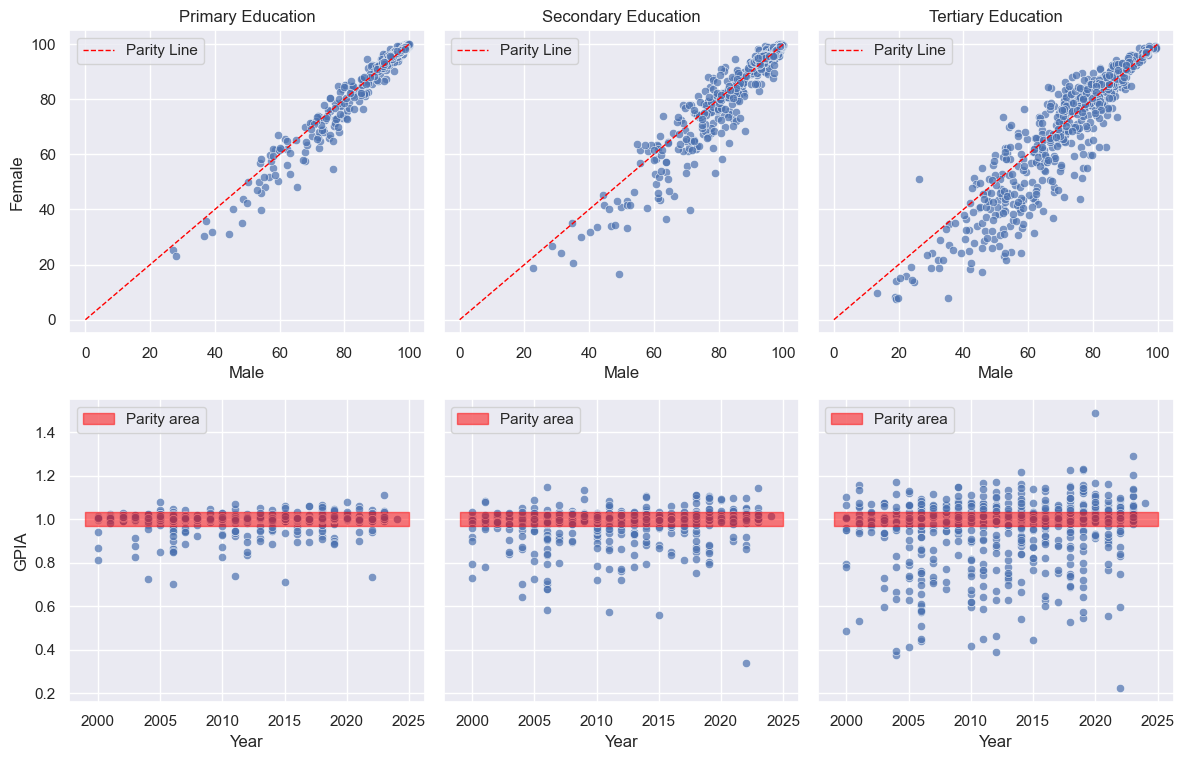

In [6]:
# Imposta la figura e i subplot
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex='row', sharey='row')

min_val = 0
max_val = 100

# Prima riga: grafici per P, S, T
sns.scatterplot(data=P, x='NART.1.M', y='NART.1.F', ax=axes[0, 0], alpha=0.7)
axes[0, 0].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[0, 0].set_title('Primary Education')
axes[0, 0].legend()

sns.scatterplot(data=S, x='NART.2.M', y='NART.2.F', ax=axes[0, 1], alpha=0.7)
axes[0, 1].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[0, 1].set_title('Secondary Education')
axes[0, 1].legend()

sns.scatterplot(data=T, x='NART.3.M', y='NART.3.F', ax=axes[0, 2], alpha=0.7)
axes[0, 2].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[0, 2].set_title('Tertiary Education')
axes[0, 2].legend()

# Seconda riga: grafici per altre variabili (esempio con GPIA)
sns.scatterplot(data=P, x='YEAR', y='NART.1.GPIA', ax=axes[1, 0], alpha=0.7)
first_year = P['YEAR'].min()-1
last_year = P['YEAR'].max()+1
axes[1,0].fill_between([first_year, last_year], 0.97, 1.03, color='red', alpha=0.5, label='Parity area')
axes[1, 0].legend(loc='upper left')

sns.scatterplot(data=S, x='YEAR', y='NART.2.GPIA', ax=axes[1, 1], alpha=0.7)
first_year = S['YEAR'].min()-1
last_year = S['YEAR'].max()+1
axes[1,1].fill_between([first_year, last_year], 0.97, 1.03, color='red', alpha=0.5, label='Parity area')
axes[1, 1].legend(loc='upper left')

sns.scatterplot(data=T, x='YEAR', y='NART.3.GPIA', ax=axes[1, 2], alpha=0.7)
first_year = T['YEAR'].min()-1
last_year = T['YEAR'].max()+1
axes[1,2].fill_between([first_year, last_year], 0.97, 1.03, color='red', alpha=0.5, label='Parity area')
axes[1, 2].legend(loc='upper left')

# Imposta i titoli degli assi
for ax in axes[0, :]:
    ax.set_xlabel('Male')
    ax.set_ylabel('Female')

for ax in axes[1, :]:
    ax.set_xlabel('Year')
    ax.set_ylabel('GPIA')

# Migliora il layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(image_path + chapter +'NART_TOTAL.pdf', dpi=2000, bbox_inches='tight')
plt.show()

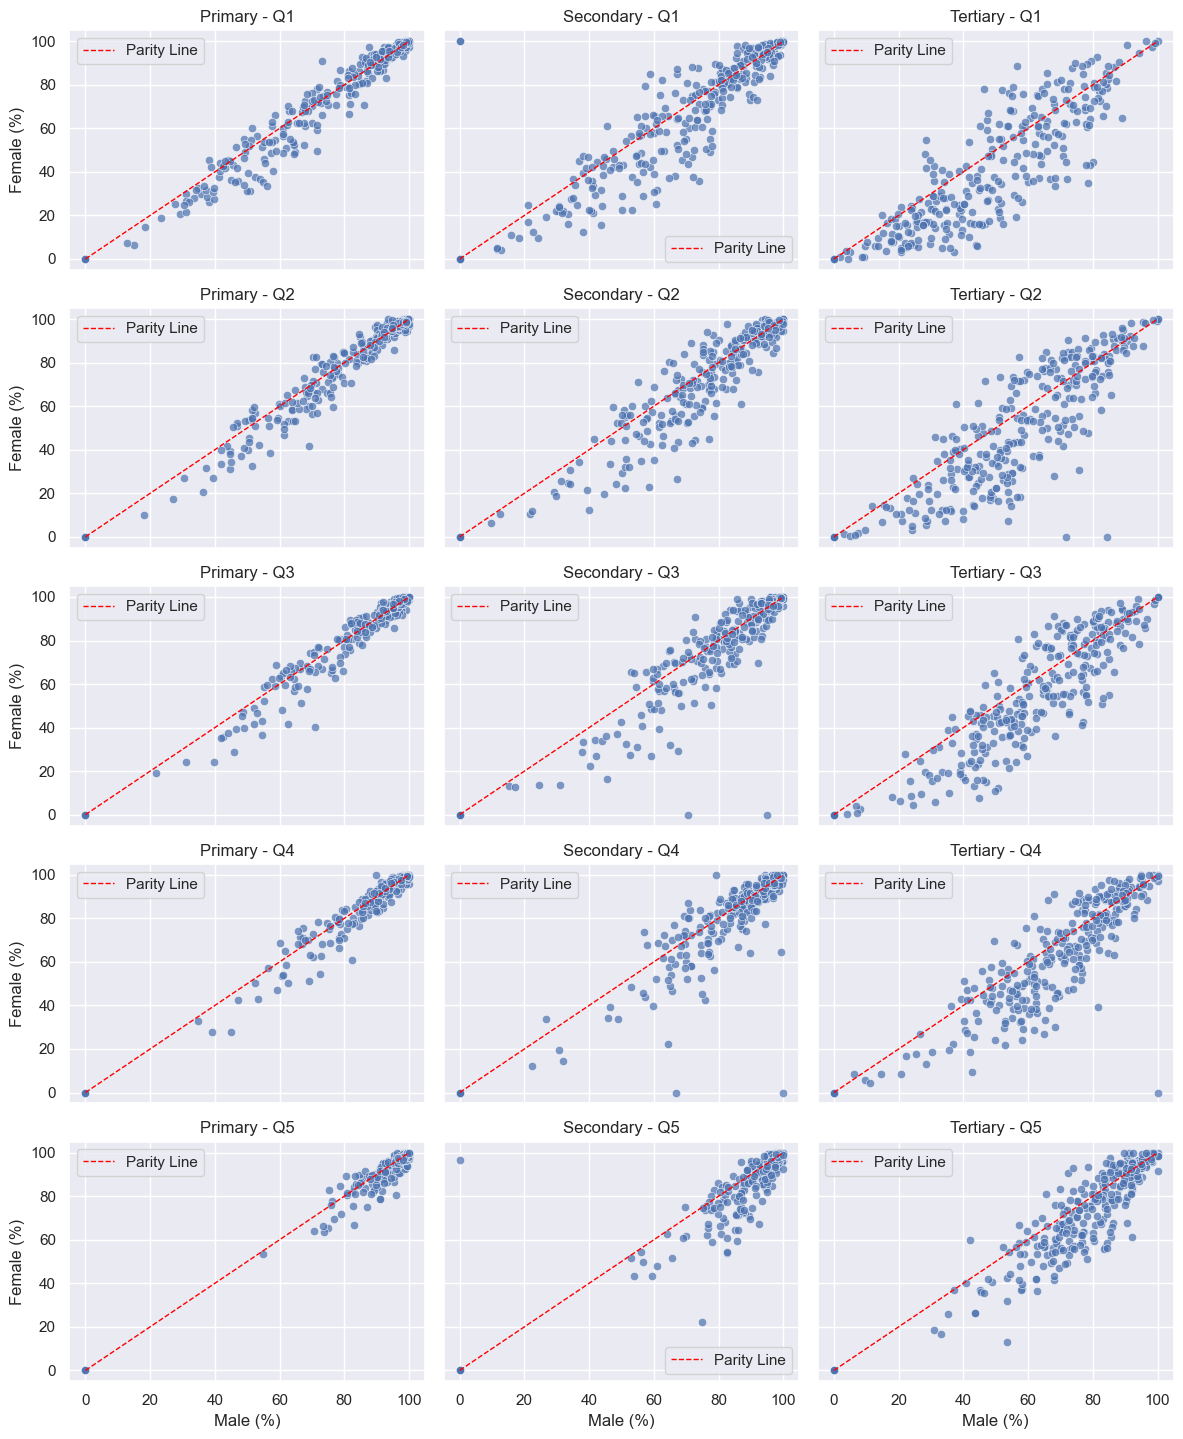

In [7]:
# Setup
fig, axes = plt.subplots(5, 3, figsize=(12, 15), sharex=True, sharey=True)

quintiles = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
education_labels = ['Primary', 'Secondary', 'Tertiary']
dfs = [P, S, T]  # i tuoi dataframe
min_val, max_val = 0, 100

# Loop sui quintili (righe) e livelli scolastici (colonne)
for i, q in enumerate(quintiles):
    for j, (df, label) in enumerate(zip(dfs, education_labels)):
        x_col = f'NART.{j+1}.{q}.M'
        y_col = f'NART.{j+1}.{q}.F'
        
        sns.scatterplot(data=df, x=x_col, y=y_col, ax=axes[i, j], alpha=0.7)
        axes[i, j].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
        axes[i, j].set_title(f'{label} - {q}')
        axes[i, j].legend()
        
        if j == 0:
            axes[i, j].set_ylabel('Female (%)')
        if i == 4:
            axes[i, j].set_xlabel('Male (%)')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(image_path + chapter +'NART_Q.pdf', dpi=2000, bbox_inches='tight')
plt.show()

# Labour

In [8]:
df2 = pd.read_csv(path + 'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)/WB_WDI_SL_TLF_CACT_FE_ZS.csv')
df3 = pd.read_csv(path + 'Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)/WB_WDI_SL_TLF_CACT_MA_ZS.csv')
df6 = pd.read_csv(path + 'Ratio of female to male labor force participation rate (modeled ILO estimate)/WB_WDI_SL_TLF_CACT_FM_ZS.csv')
Male = df3.copy()
Female = df2.copy()
Ratio = df6.copy()
Male = Male[['REF_AREA_ID','REF_AREA_NAME','TIME_PERIOD','OBS_VALUE','SEX_ID']]
Female = Female[['REF_AREA_ID','REF_AREA_NAME','TIME_PERIOD','OBS_VALUE','SEX_ID']]
df = pd.merge(Male,Female, on=['REF_AREA_ID','REF_AREA_NAME','TIME_PERIOD'], how='outer')
df = df.rename(columns={'OBS_VALUE_x': 'VALUE_MALE', 'OBS_VALUE_y': 'VALUE_FEMALE'})
df.drop(columns=['SEX_ID_x', 'SEX_ID_y'], inplace=True)

In [9]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia',
    'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
    'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
    'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
    'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
    'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",'Croatia', 'Cuba', 'Cyprus',
    'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
    'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
    'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana',
    'Greece','Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong SAR, China',
    'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Ireland',
    'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
    "Korea, Dem. People's Rep.", 'Korea, Rep.', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR',
    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Macao SAR, China',
    'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania',
    'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique',
    'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger',
    'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama',
    'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
    'Puerto Rico', 'Qatar', 'Romania', 'Russian Federation', 'Rwanda', 'Samoa',
    'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
    'Sierra Leone', 'Singapore', 'Slovak Republic', 'Slovenia', 'Solomon Islands',
    'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka', 'St. Lucia',
    'St. Vincent and the Grenadines', 'Sudan', 'Suriname', 'Sweden', 'Switzerland',
    'Syrian Arab Republic', 'Taiwan, China', 'Tajikistan', 'Tanzania', 'Thailand',
    'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkiye',
    'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
    'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Viet Nam', 'Virgin Islands (U.S.)', 'West Bank and Gaza',
    'Yemen, Rep.', 'Zambia', 'Zimbabwe'
]

east_asia_pacific = [
    'American Samoa', 'Australia', 'Brunei Darussalam', 'Cambodia', 'China',
    'Fiji', 'French Polynesia', 'Guam', 'Hong Kong SAR, China', 'Indonesia',
    'Japan', 'Kiribati', "Korea, Dem. People's Rep.", 'Korea, Rep.', 'Lao PDR',
    'Macao SAR, China', 'Malaysia', 'Marshall Islands', 'Micronesia, Fed. Sts.',
    'Mongolia', 'Myanmar', 'Nauru', 'New Caledonia', 'New Zealand',
    'Northern Mariana Islands', 'Palau', 'Papua New Guinea', 'Philippines',
    'Samoa', 'Singapore', 'Solomon Islands', 'Taiwan, China', 'Thailand',
    'Timor-Leste', 'Tonga', 'Tuvalu', 'Vanuatu', 'Viet Nam'
]
europe_central_asia = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
    'Bosnia and Herzegovina', 'Bulgaria', 'Channel Islands', 'Croatia', 'Cyprus',
    'Czechia', 'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'France', 'Georgia',
    'Germany', 'Gibraltar', 'Greece', 'Greenland', 'Hungary', 'Iceland', 'Ireland',
    'Isle of Man', 'Italy', 'Kazakhstan', 'Kosovo', 'Kyrgyz Republic', 'Latvia',
    'Liechtenstein', 'Lithuania', 'Luxembourg', 'Moldova', 'Monaco', 'Montenegro',
    'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
    'Russian Federation', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia',
    'Spain', 'Sweden', 'Switzerland', 'Tajikistan', 'Turkiye', 'Turkmenistan',
    'Ukraine', 'United Kingdom', 'Uzbekistan'
]
latin_america_caribbean = [
    'Antigua and Barbuda', 'Argentina', 'Aruba', 'Bahamas, The', 'Barbados', 'Belize',
    'Bolivia', 'Brazil', 'British Virgin Islands', 'Cayman Islands', 'Chile',
    'Colombia', 'Costa Rica', 'Cuba', 'Curacao', 'Dominica', 'Dominican Republic',
    'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
    'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico',
    'Sint Maarten (Dutch part)', 'St. Kitts and Nevis', 'St. Lucia',
    'St. Martin (French part)', 'St. Vincent and the Grenadines', 'Suriname',
    'Trinidad and Tobago', 'Turks and Caicos Islands', 'Uruguay', 'Venezuela, RB',
    'Virgin Islands (U.S.)'
]
middle_east_north_africa = [
    'Algeria', 'Bahrain', 'Djibouti', 'Egypt, Arab Rep.', 'Iran, Islamic Rep.',
    'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Malta',
    'Morocco', 'Oman', 'Qatar', 'Saudi Arabia', 'Syrian Arab Republic', 'Tunisia',
    'United Arab Emirates', 'West Bank and Gaza', 'Yemen, Rep.'
]
north_america = [
    'Bermuda', 'Canada', 'United States'
]
south_asia = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]
sub_saharan_africa = [
    'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
    'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
    'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
    'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
    'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
    'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
    'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
    'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
    'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania',
    'Togo', 'Uganda', 'Zambia', 'Zimbabwe'
]

In [10]:
# Definisci una funzione per mappare i paesi alle regioni
def assign_region(country):
    if country in east_asia_pacific:
        return 'East Asia & Pacific'
    elif country in europe_central_asia:
        return 'Europe & Central Asia'
    elif country in latin_america_caribbean:
        return 'Latin America & Caribbean'
    elif country in middle_east_north_africa:
        return 'Middle East & North Africa'
    elif country in north_america:
        return 'North America'
    elif country in south_asia:
        return 'South Asia'
    elif country in sub_saharan_africa:
        return 'Sub-Saharan Africa'
    else:
        return 'Other'

In [11]:
df_countries = df[df['REF_AREA_NAME'].isin(countries)].copy()

# Applica la funzione per creare la colonna REGION
df_countries.loc[:, 'REGION'] = df_countries.loc[:,'REF_AREA_NAME'].apply(assign_region)

df_filtered = df_countries.dropna(subset=['VALUE_MALE', 'VALUE_FEMALE', 'REGION'])
centroids = df_filtered.groupby('REGION')[['VALUE_MALE', 'VALUE_FEMALE']].mean().reset_index()

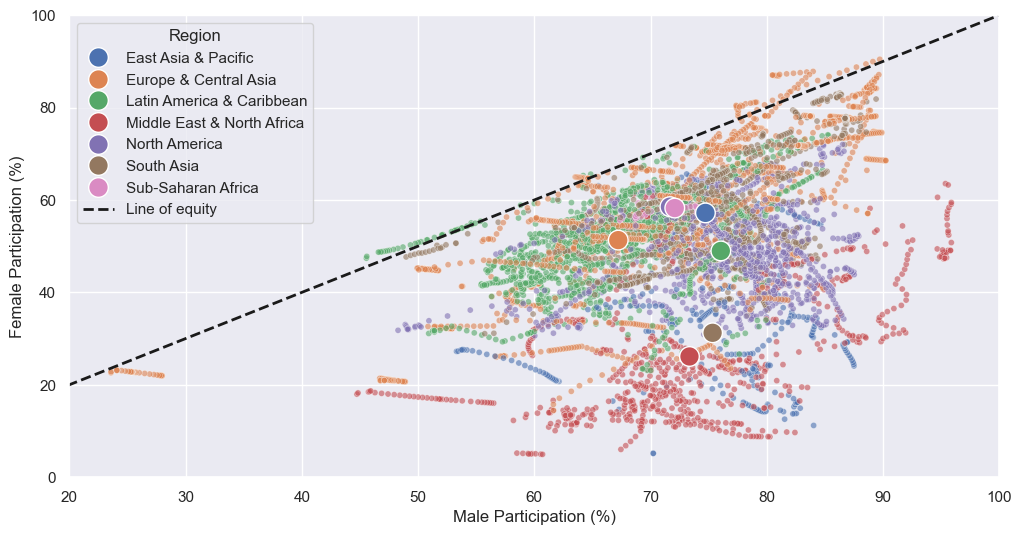

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='VALUE_MALE', y='VALUE_FEMALE',
                hue='REGION', s=20, alpha=0.6, legend=False)

sns.scatterplot(data=centroids, x='VALUE_MALE', y='VALUE_FEMALE',
                hue='REGION', marker='o', s=200, edgecolor='white', linewidth=1,
                legend=True)
plt.plot([0, 100], [0, 100], 'k--', lw=2, label='Line of equity')  # Line of equality

# plt.title('Labor force participation rate % of male population ages 15+')
plt.xlabel('Male Participation (%)')
plt.ylabel('Female Participation (%)')
plt.xlim(20, 100)
plt.ylim(0, 100)
plt.legend(loc='upper left', title='Region')
plt.savefig(image_path + chapter +'labour_Rates_MvsF.pdf', dpi=2000, bbox_inches='tight')
plt.show()

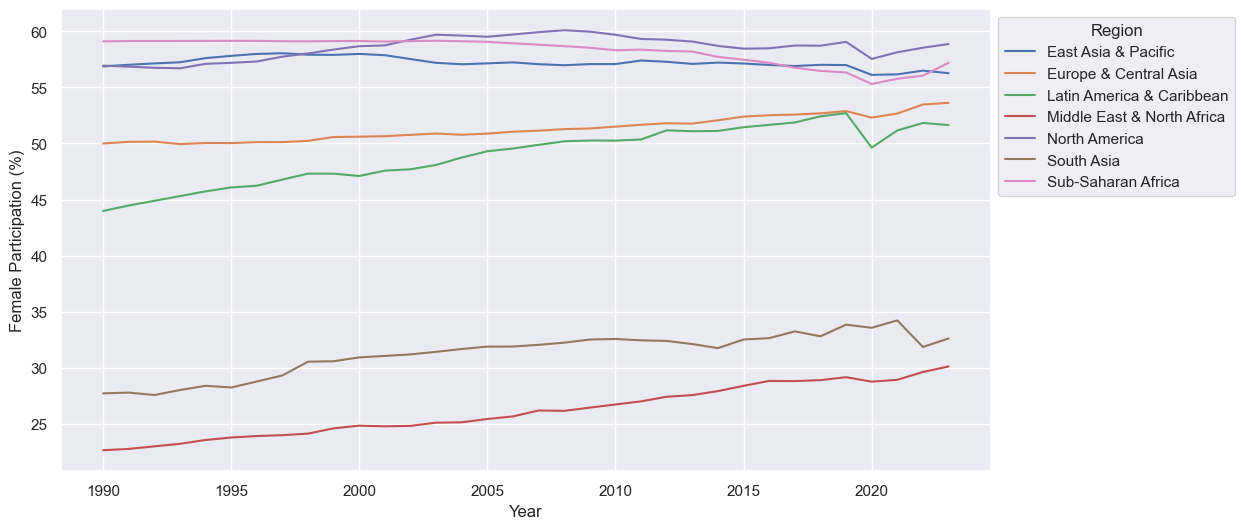

In [13]:
Ratio = Ratio[['REF_AREA_ID','REF_AREA_NAME','TIME_PERIOD','OBS_VALUE','SEX_ID']]
Ratio_countries = Ratio[Ratio['REF_AREA_NAME'].isin(countries)].copy()

# Applica la funzione per creare la colonna REGION
Ratio_countries.loc[:, 'REGION'] = Ratio_countries.loc[:,'REF_AREA_NAME'].apply(assign_region)

Ratio_filtered = Ratio_countries.dropna()
Ratio_filtered = Ratio_filtered.groupby(['TIME_PERIOD', 'REGION'])['OBS_VALUE'].mean().reset_index()

means = df_filtered.groupby(['REGION','TIME_PERIOD'])[['VALUE_FEMALE']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=means, x='TIME_PERIOD', y='VALUE_FEMALE', hue='REGION')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Region')
plt.xlabel('Year')
plt.ylabel('Female Participation (%)')
plt.savefig(image_path + chapter +'labour_F_Rate.pdf', dpi=2000, bbox_inches='tight')
plt.show()

# Quotas

In [14]:
df = pd.read_csv(path + 'Gender Quotas Database/parliaments.csv', sep=';')
columns_to_convert = [
    'Single/Lower House>Total seats',
    'Single/Lower House>Seats held by women',
    'Upper house>Total seats',
    'Upper house>Seats held by women',
]

# 1) Clean & convert all four columns to float
for col in columns_to_convert:
    df[col] = (
        df[col]
          .astype(str)
          .str.replace(',', '', regex=False)     # drop thousands sep
          .str.strip()                           # drop stray spaces
          .pipe(pd.to_numeric, errors='coerce')  # convert to NaN on bad
          .astype(float)
    )

# 2) Now compute your ratios
df['Quota_L'] = (
    df['Single/Lower House>Seats held by women']
    / df['Single/Lower House>Total seats']
)
df['Quota_U'] = (
    df['Upper house>Seats held by women']
    / df['Upper house>Total seats']
)
df['Quota_avg'] = df[['Quota_L', 'Quota_U']].mean(axis=1)
df['Quota_avg_percent'] = df['Quota_avg'] * 100
df['Quota_L_percent'] = df['Quota_L'] * 100

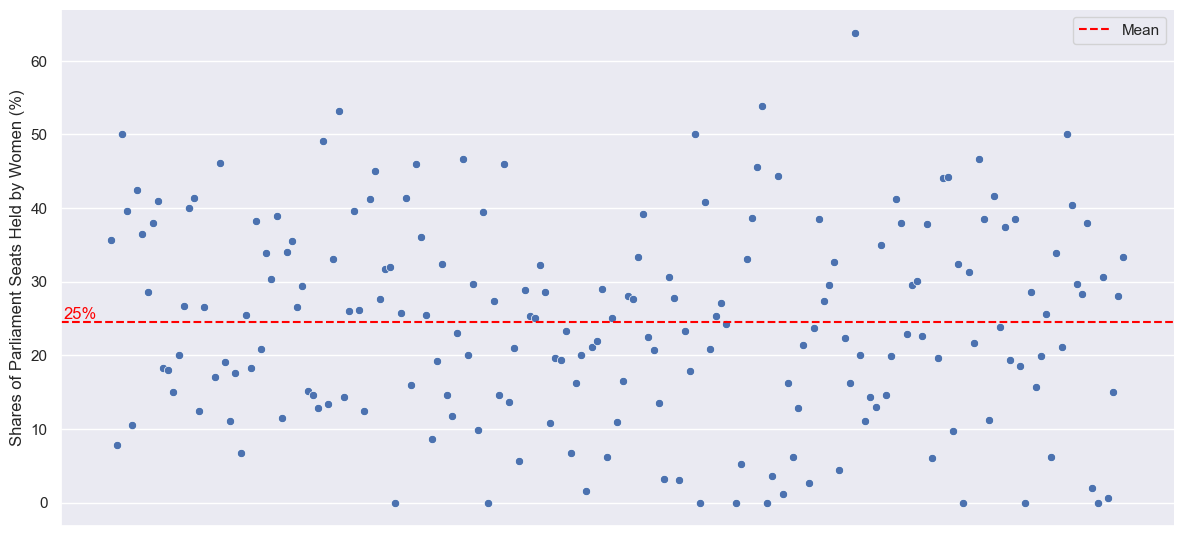

In [15]:
sns.relplot(x='ISO2', y='Quota_L_percent', data=df,height=6, aspect=2)
mean = df['Quota_L_percent'].mean()
plt.axhline(mean, color='red', linestyle='--', label='Mean')

plt.text(
    x=-5, y=mean+0.5,  # Posizione del testo (x è un valore arbitrario)
    s=f"{mean:.0f}%",  # Testo da mostrare
    color='red', fontsize=12, ha='center'
)
plt.ylabel("Shares of Parliament Seats Held by Women (%)")
plt.xlabel('')
plt.xticks([])
plt.legend()
plt.savefig(image_path + chapter +'Par_shares_L.pdf', dpi=2000, bbox_inches='tight')
plt.show()

In [16]:
fig = px.choropleth(
    df,
    locations="ISO3",           # Colonna dei nomi dei paesi
    locationmode="ISO-3",   # Usa i nomi dei paesi
    color="Quota_L_percent",                  # Colonna con i valori numerici
    color_continuous_scale="Blues", # Scegli una scala di colori
)
fig.update_geos(
    showframe=False,
    showcoastlines=True,
    showland=True,
    showocean=True,
    landcolor='darkgray',
    oceancolor="#E0FFFF", 
    projection_type="natural earth"
)

fig.update_layout(
    margin={"r":0,"t":10,"l":10,"b":10},
    coloraxis_colorbar=dict(
        title="(%)",
        ticks="outside",
        ticklen=5,
        tickcolor='darkgray'
    ),
    font=dict(
        family="Helvetica",
        size=14,
        color="black"
    ),
    width=1200,
    height=600,
)
fig.update_traces(
    marker_line_width=0.5, 
    marker_line_color="black",
    autocolorscale=False,
    colorbar_title="(%)"
)
fig.write_image(image_path + chapter +'Par_world_L.pdf', format='pdf', scale=2)
fig.show()

# Current state

In [17]:
def Pivoting(df): # Function to pivot the dataframe
    df_r = df.pivot(index=['iso3','hdicode','region','year'], columns='indicator_name', values='value').reset_index()
    df_r.reset_index(inplace=True)
    df_r.columns.name = None
    df_r.drop(columns=['index'], inplace=True)
    df_r['year'] = pd.to_datetime(df_r['year'], format='%Y',errors='coerce').dt.year
    return df_r

In [25]:
hdr = pd.read_csv(path + 'HDR/HDR25_Composite_indices_complete_time_series.csv',encoding='latin1') # Human Development Index
hdr_labels = pd.read_excel(path + 'HDR/HDR25_Composite_indices_metadata.xlsx', sheet_name = 'codebook') # Human Development
hdr_labels.drop(columns=['Time series'], inplace=True)
hdr_labels.dropna(subset=['Short name'], inplace=True)
hdr_labels.rename(columns={'Full name': 'indicator_name', 'Short name': 'indicator'}, inplace=True)
HDR = hdr.copy()
df_melted = HDR.melt(id_vars=['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2023'], var_name='indicator_year', value_name='value') # Melt the dataframe to long format
df_melted[['indicator', 'year']] = df_melted['indicator_year'].str.extract(r'([a-z0-9_]+)_(\d{4})')
df_final = df_melted[['iso3','hdicode','region','year', 'indicator', 'value']] # Reorder and select final columns
HDR = pd.merge(hdr_labels, df_final, on=['indicator'], how='right') # Merge with labels
HDI_indicators = ['hdi', 'le', 'eys', 'mys', 'gnipc']
GDI_indicators = ['gdi_group', 'gdi', 'hdi_f', 'le_f', 'eys_f', 'mys_f', 'gni_pc_f', 'hdi_m', 'le_m', 'eys_m', 'mys_m', 'gni_pc_m']
IHDI_indicators = ['ihdi', 'coef_ineq', 'loss', 'ineq_le', 'ineq_edu', 'ineq_inc']
GII_indicators = ['gii_rank', 'gii', 'mmr', 'abr', 'se_f', 'se_m', 'pr_f', 'pr_m', 'lfpr_f', 'lfpr_m']
PHDI_indicators = ['rankdiff_hdi_phdi', 'phdi', 'diff_hdi_phdi', 'co2_prod', 'mf']
Population_indicator = ['pop_total']
hdi = HDR[HDR['indicator'].isin(HDI_indicators+Population_indicator)]
gdi = HDR[HDR['indicator'].isin(GDI_indicators+Population_indicator)]
ihdi = HDR[HDR['indicator'].isin(IHDI_indicators+Population_indicator)]
gii = HDR[HDR['indicator'].isin(GII_indicators+Population_indicator)]
phdi = HDR[HDR['indicator'].isin(PHDI_indicators+Population_indicator)]
HDI = Pivoting(hdi)
GDI = Pivoting(gdi)
IHDI = Pivoting(ihdi)
GII = Pivoting(gii)
HDR_idx = {'hdi': 'Human Development Index (value)', 'gii': 'Gender Inequality Index (value)', 
           'gdi': 'Gender Development Index (value)', 'ihdi': 'Inequality-adjusted Human Development Index (value)'}

In [19]:
fig = px.choropleth(
    GII,
    locations="iso3",
    locationmode="ISO-3",
    color=HDR_idx['gii'],  # Colonna con i valori numerici
    color_continuous_scale=list(reversed(px.colors.sequential.Blues)),  # Scala invertita
)


fig.update_geos(
    showframe=False,
    showcoastlines=True,
    showland=True,
    showocean=True,
    landcolor='darkgray',
    oceancolor="#E0FFFF", 
    projection_type="natural earth"
)

fig.update_layout(
    margin={"r":0, "t":10, "l":10, "b":10},
    coloraxis_colorbar=dict(
        title="Value",  # Titolo corretto della barra dei colori
        ticks="outside",
        ticklen=5,
        tickcolor='darkgray'
    ),
    font=dict(
        family="Helvetica",
        size=14,
        color="black"
    ),
    width=1200,
    height=600,
)

# Inverti la scala dei colori
fig.update_traces(
    marker_line_width=0.5, 
    marker_line_color="black",
    autocolorscale=False,
    reversescale=True  # Inverti la scala dei colori
)

fig.write_image(image_path + chapter +'GII.pdf', format='pdf', scale=2)
fig.show()

# Results

In [20]:
chapter = 'Res/'

In [21]:
def PrepareData(df,ind): # Function to prepare the data for analysis
    Panel = df.copy()
    shift = ind.replace('_value', '') + '_shifted'
    Panel[shift] = Panel.groupby('iso3')[ind].shift(1)
    Panel.dropna(subset = shift ,inplace=True) # Drop rows with NaN values
    return Panel

In [22]:
gdp_pc_ppp = pd.read_csv(path + 'GDP per capita, PPP (current international)/WB_WDI_NY_GDP_PCAP_PP_CD.csv') # GDP per capita, PPP (current international $)

In [23]:
GDP = gdp_pc_ppp.copy()
GDP = GDP[['REF_AREA_ID','TIME_PERIOD','OBS_VALUE']]
GDP.rename(columns={'REF_AREA_ID':'iso3','TIME_PERIOD':'year','OBS_VALUE':'GDP'},inplace=True)
GDP['year'] = pd.to_datetime(GDP['year'], format='%Y',errors='coerce').dt.year
GDP['logGDP'] = np.log(GDP['GDP'])

In [26]:
# GDP and GII
GDP_GII = pd.merge(GDP, GII, on=["iso3", "year"],how="inner")
GDP_GII.columns.name = None
Panel_GII = PrepareData(GDP_GII,HDR_idx['gii']) # Prepare the GII data
Panel_GII = Panel_GII[~Panel_GII['iso3'].isin(['KWT', 'ARE', 'SAU', 'QAT'])] # Filter the GII data to include only countries present in the GDP data

# GDP and GII + HDI_female
GDP_GII_GDI = pd.merge(GDP_GII, GDI, on=["iso3", "year", "hdicode", "region"],how="inner")
GDP_GII_GDI.columns.name = None
Panel_GII_GDI = PrepareData(GDP_GII_GDI,HDR_idx['gii']) # Prepare the GII data
Panel_GII_GDI = PrepareData(Panel_GII_GDI,'HDI female (value)') # Prepare the GII data

# GDP and HDI_female
GDP_GDI = pd.merge(GDP, GDI, on=["iso3", "year"],how="inner")
GDP_GDI.columns.name = None
Panel_GDI = PrepareData(GDP_GDI,'HDI female (value)') # Prepare the GII data

# GDP and HDI
GDP_HDI = pd.merge(GDP, HDI, on=["iso3", "year"],how="inner")
GDP_HDI.columns.name = None
Panel_HDI = PrepareData(GDP_HDI,HDR_idx['hdi']) # Prepare the GII data

# HDI and GII
HDI_GII = pd.merge(HDI, GII, on=["iso3", "year","hdicode","region"],how="inner")
HDI_GII.columns.name = None
Panel_HDI_GII = PrepareData(HDI_GII,HDR_idx['gii']) # Prepare the GII data

# HDI_female and GDI
GDI_GII = pd.merge(GDI, GII, on=["iso3", "year"],how="inner")
GDI_GII.columns.name = None

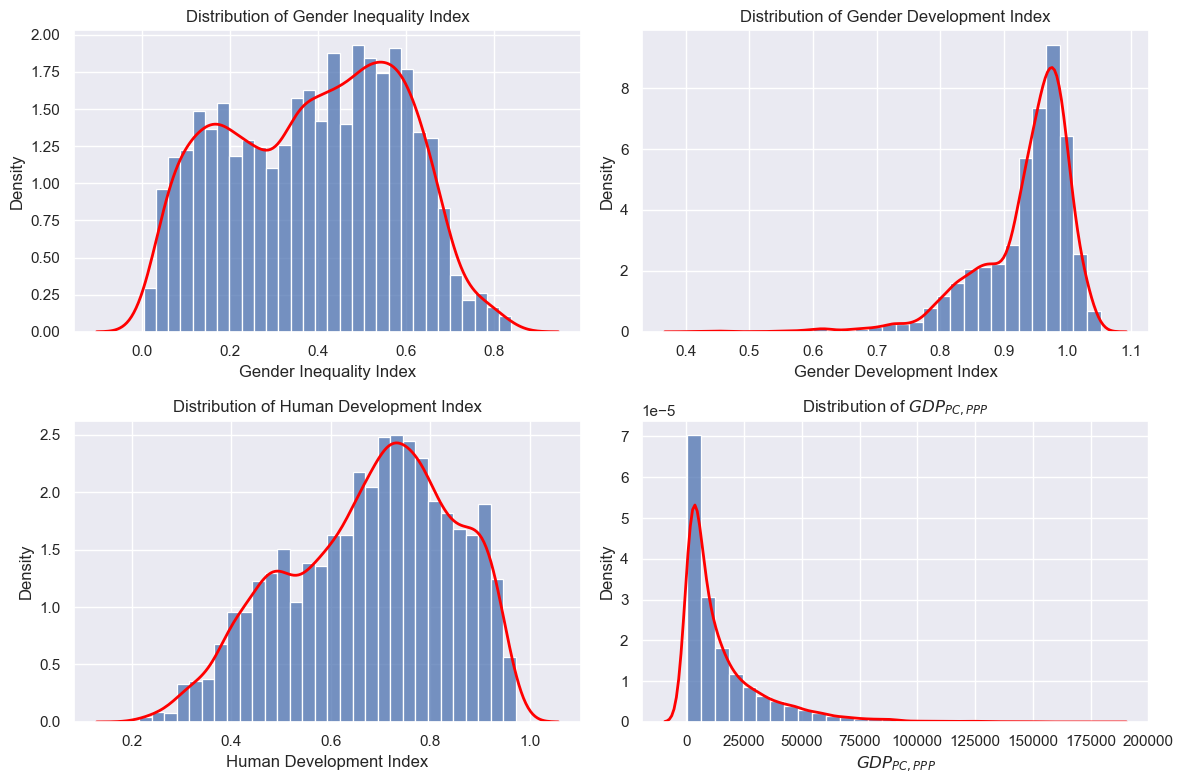

In [27]:
fig, ax = plt.subplots(2,2,figsize=(12, 8))
sns.histplot(data=GII, x='Gender Inequality Index (value)', bins=30, stat="density", ax=ax[0,0])
sns.kdeplot(data=GII, x='Gender Inequality Index (value)', color="red", lw=2, ax=ax[0,0])
ax[0,0].set_xlabel('Gender Inequality Index')
ax[0,0].set_ylabel('Density')
ax[0,0].set_title('Distribution of Gender Inequality Index')

sns.histplot(data=GDI, x='Gender Development Index (value)', bins=30, stat="density", ax=ax[0,1])
sns.kdeplot(data=GDI, x='Gender Development Index (value)', color="red", lw=2, ax=ax[0,1])
ax[0,1].set_xlabel('Gender Development Index')
ax[0,1].set_ylabel('Density')
ax[0,1].set_title('Distribution of Gender Development Index')

sns.histplot(data=HDI, x='Human Development Index (value)', bins=30, stat="density", ax=ax[1,0])
sns.kdeplot(data=HDI, x='Human Development Index (value)', color="red", lw=2, ax=ax[1,0])
ax[1,0].set_xlabel('Human Development Index')
ax[1,0].set_ylabel('Density')
ax[1,0].set_title('Distribution of Human Development Index')

sns.histplot(data=GDP, x='GDP', bins=30, stat="density", ax=ax[1,1])
sns.kdeplot(data=GDP, x='GDP', color="red", lw=2, ax=ax[1,1])
ax[1,1].set_xlabel(r'$GDP_{PC,PPP}$')
ax[1,1].set_ylabel('Density')
ax[1,1].set_title(r'Distribution of $GDP_{PC,PPP}$')

plt.tight_layout()
plt.savefig(image_path + chapter +'Distribution.pdf', dpi=2000, bbox_inches='tight')
plt.show()

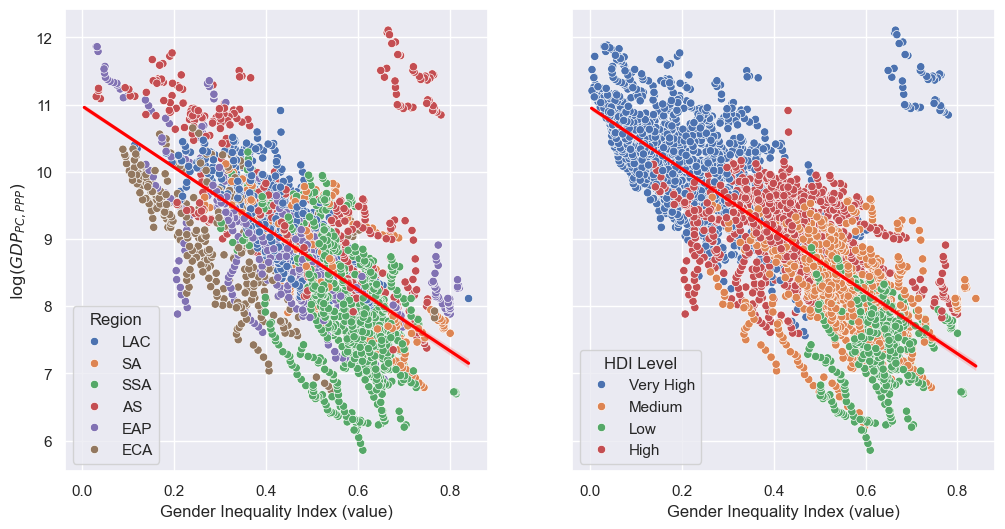

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Scatter plot with trend line
sns.scatterplot(data=PrepareData(GDP_GII,HDR_idx['gii']), x=HDR_idx['gii']+'_shifted', y='logGDP', hue='region', ax=ax[0])
sns.regplot(data=PrepareData(GDP_GII,HDR_idx['gii']), x=HDR_idx['gii']+'_shifted', y='logGDP', scatter=False, ax=ax[0], color='red', line_kws={"label": "Trend Line"})
ax[0].legend(title='Region')
ax[0].set_xlabel('Gender Inequality Index (value)')
ax[0].set_ylabel(r'$\log (GDP_{PC,PPP})$')

sns.scatterplot(data=PrepareData(GDP_GII,HDR_idx['gii']), x=HDR_idx['gii']+'_shifted', y='logGDP', hue='hdicode',ax=ax[1])
sns.regplot(data=PrepareData(GDP_GII,HDR_idx['gii']), x=HDR_idx['gii'], y='logGDP', scatter=False, ax=ax[1], color='red', line_kws={"label": "Trend Line"})
ax[1].legend(title='HDI Level')
ax[1].set_xlabel('Gender Inequality Index (value)')
ax[1].set_ylabel(r'$\log (GDP_{PC,PPP})$')

plt.savefig(image_path + chapter +'GDP_GII.pdf', dpi=2000, bbox_inches='tight')
plt.show()

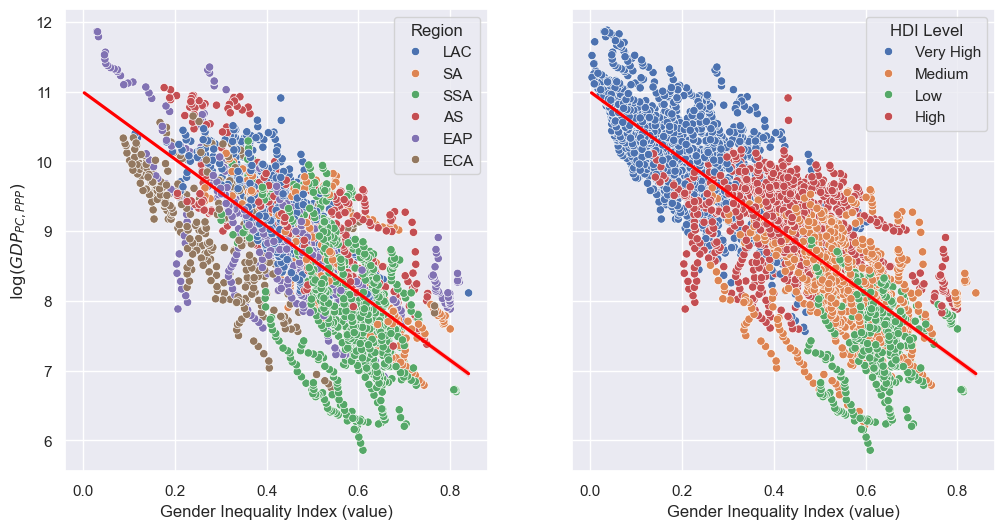

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Scatter plot with trend line
sns.scatterplot(data=Panel_GII, x=HDR_idx['gii']+'_shifted', y='logGDP', hue='region', ax=ax[0])
sns.regplot(data=Panel_GII, x=HDR_idx['gii'], y='logGDP', scatter=False, ax=ax[0], color='red', line_kws={"label": "Trend Line"})
ax[0].legend(title='Region')
ax[0].set_xlabel('Gender Inequality Index (value)')
ax[0].set_ylabel(r'$\log (GDP_{PC,PPP})$')

sns.scatterplot(data=Panel_GII, x=HDR_idx['gii']+'_shifted', y='logGDP', hue='hdicode',ax=ax[1])
sns.regplot(data=Panel_GII, x=HDR_idx['gii'], y='logGDP', scatter=False, ax=ax[1], color='red', line_kws={"label": "Trend Line"})
ax[1].legend(title='HDI Level')
ax[1].set_xlabel('Gender Inequality Index (value)')
ax[1].set_ylabel(r'$\log (GDP_{PC,PPP})$')

plt.savefig(image_path + chapter +'GDP_GII_noAS.pdf', dpi=2000, bbox_inches='tight')
plt.show()

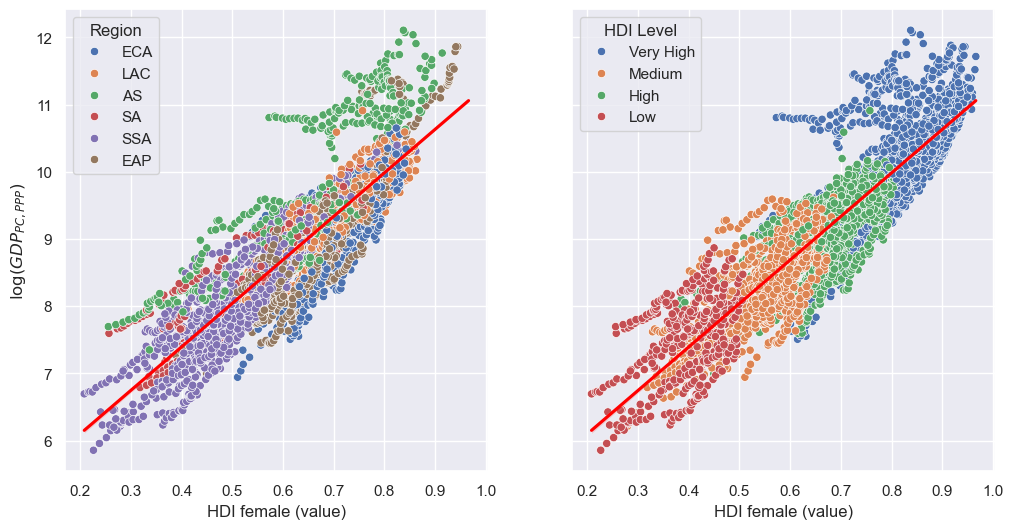

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Scatter plot with trend line
sns.scatterplot(data=Panel_GDI, x='HDI female (value)'+'_shifted', y='logGDP', hue='region', ax=ax[0])
sns.regplot(data=Panel_GDI, x='HDI female (value)'+'_shifted', y='logGDP', scatter=False, ax=ax[0], color='red', line_kws={"label": "Trend Line"})
ax[0].legend(title='Region')
ax[0].set_xlabel('HDI female (value)')
ax[0].set_ylabel(r'$\log (GDP_{PC,PPP})$')

sns.scatterplot(data=Panel_GDI, x='HDI female (value)'+'_shifted', y='logGDP', hue='hdicode',ax=ax[1])
sns.regplot(data=Panel_GDI, x='HDI female (value)'+'_shifted', y='logGDP', scatter=False, ax=ax[1], color='red', line_kws={"label": "Trend Line"})
ax[1].legend(title='HDI Level')
ax[1].set_xlabel('HDI female (value)')
ax[1].set_ylabel(r'$\log (GDP_{PC,PPP})$')


plt.savefig(image_path + chapter +'GDP_HDI_female.pdf', dpi=2000, bbox_inches='tight')
plt.show()

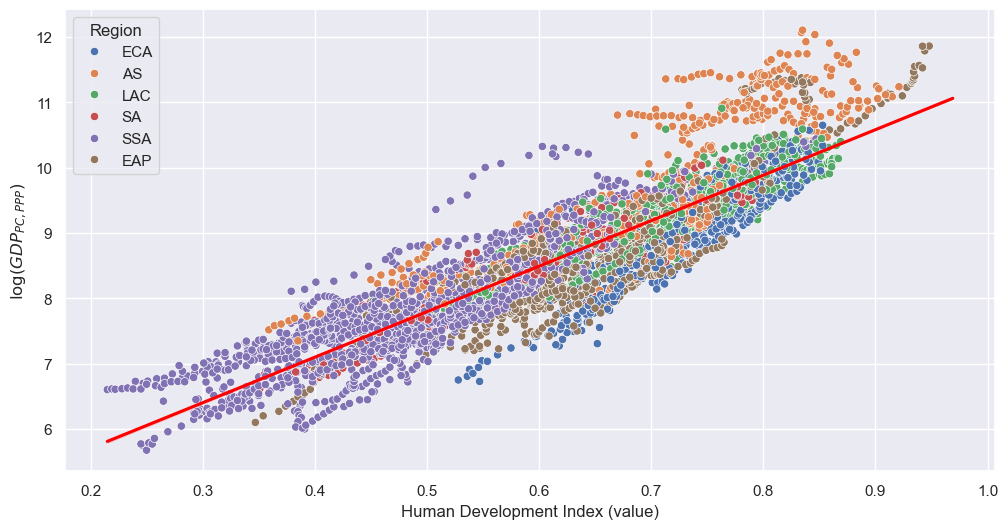

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Panel_HDI, x=HDR_idx['hdi']+'_shifted', y='logGDP', hue='region',)
sns.regplot(data=Panel_HDI, x=HDR_idx['hdi']+'_shifted', y='logGDP', scatter=False, color='red', line_kws={"label": "Trend Line"})
plt.ylabel(r'$\log (GDP_{PC,PPP})$')
plt.xlabel('Human Development Index (value)')
plt.legend(title='Region')

plt.savefig(image_path + chapter +'GDP_HDI.pdf', dpi=2000, bbox_inches='tight')
plt.show()

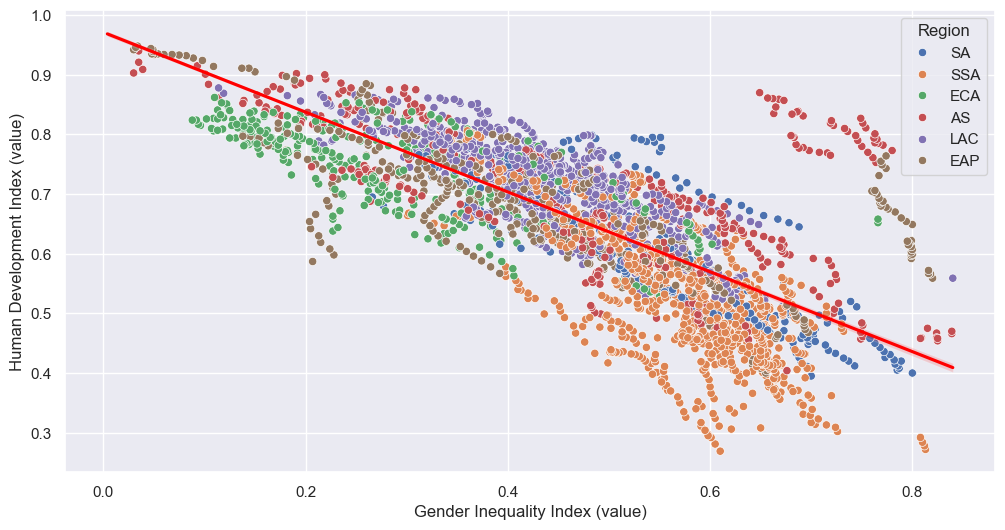

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Panel_HDI_GII, x=HDR_idx['gii']+'_shifted', y=HDR_idx['hdi'], hue='region')
sns.regplot(data=Panel_HDI_GII, x=HDR_idx['gii']+'_shifted', y=HDR_idx['hdi'], scatter=False, color='red', line_kws={"label": "Trend Line"})
plt.ylabel(HDR_idx['hdi'])
plt.xlabel(HDR_idx['gii'])
plt.legend(title='Region')

plt.savefig(image_path + chapter +'HDI_GII.pdf', dpi=2000, bbox_inches='tight')
plt.show()

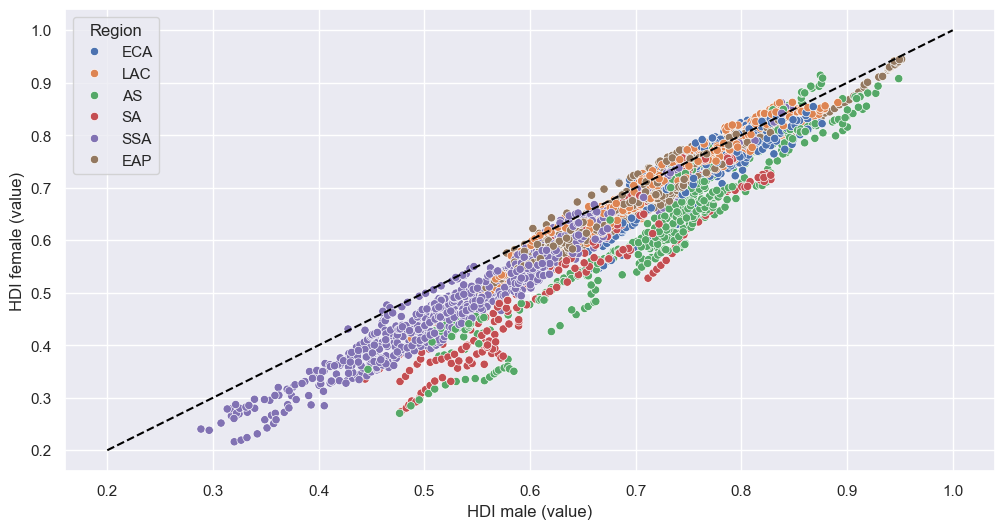

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Panel_GDI, y='HDI female (value)', x='HDI male (value)', hue='region')
plt.plot([0.2, 1], [0.2, 1], color='black', linestyle='--')
plt.legend(title='Region')

plt.savefig(image_path + chapter +'HDI_Female_vs_Male.pdf', dpi=2000, bbox_inches='tight')
plt.show()

# GAP

In [34]:
GII_2023 = GII[GII['year'] == 2023].copy()
GII_2003 = GII[GII['year'] == 2003].copy()
GDP_2023 = GDP[GDP['year'] == 2023].copy()
GDP_2003 = GDP[GDP['year'] == 2003].copy()

In [35]:
Gap_GII = pd.merge(GII_2023[['iso3', 'year', HDR_idx['gii']]], GII_2003[['iso3', 'year', HDR_idx['gii']]], on='iso3', how='inner')
Gap_GDP = pd.merge(GDP_2023[['iso3', 'year', 'logGDP']], GDP_2003[['iso3', 'year', 'logGDP']], on='iso3', how='inner')
GAP_GDP_GII = pd.merge(Gap_GDP, Gap_GII, on=['iso3','year_x','year_y'], how='inner')

In [36]:
GAP_GDP_GII.columns = (
    GAP_GDP_GII.columns
      .str.replace(r'_x$', '_2023', regex=True)
      .str.replace(r'_y$', '_2003', regex=True)
)

In [37]:
GAP_GDP_GII.dropna(inplace=True)
GAP_GDP_GII['diff_logGDP'] = GAP_GDP_GII['logGDP_2023'] - GAP_GDP_GII['logGDP_2003']
GAP_GDP_GII['diff_Gender Inequality Index (value)'] = GAP_GDP_GII[HDR_idx['gii'] + '_2023'] - GAP_GDP_GII[HDR_idx['gii'] + '_2003']

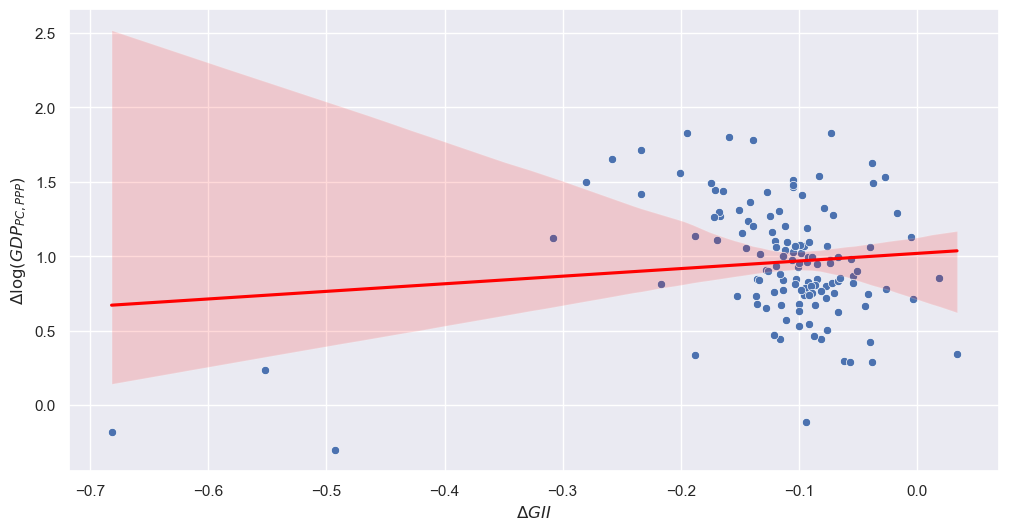

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=GAP_GDP_GII, y='diff_logGDP', x='diff_Gender Inequality Index (value)')
sns.regplot(data=GAP_GDP_GII, y='diff_logGDP', x='diff_Gender Inequality Index (value)', scatter=False, color='red', line_kws={"label": "Trend Line"})
plt.ylabel(r'$\Delta\log (GDP_{PC,PPP})$')
plt.xlabel(r'$\Delta GII$')

plt.savefig(image_path + chapter + 'Deltas.pdf', dpi=1500, bbox_inches='tight')
plt.show()